In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc


In [ ]:
%matplotlib inline

In [ ]:
sns.set_theme(style="white")

#### Load dataset

In [ ]:
%ls ../data/

GSE62944_06_01_15_TCGA_24_CancerType_Samples.txt
GSE62944_06_01_15_TCGA_24_Normal_CancerType_Samples.txt
GSM1536837_06_01_15_TCGA_24.tumor_Rsubread_FeatureCounts.txt
GSM1697009_06_01_15_TCGA_24.normal_Rsubread_FeatureCounts.txt


In [ ]:
data_path = '../data/'

In [ ]:
df_tumor_counts = pd.read_csv('data/GSM1536837_06_01_15_TCGA_24.tumor_Rsubread_FeatureCounts.txt', 
                              sep='\t', index_col=[0]).T
df_tumor_counts.head()

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tAKR
TCGA-02-0047-01A-01R-1849-01,30,277,38,1,118,65901,98,4,87,4,...,805,283,568,2094,3,2140,7966,2691,1135,1
TCGA-02-0055-01A-01R-1849-01,32,889,47,3,183,90779,8,2,1069,3,...,543,198,513,1291,16,1862,25095,1329,1469,1
TCGA-02-2483-01A-01R-1849-01,51,784,51,1,91,58260,17,8,242,2,...,1864,138,1022,2349,122,3125,14291,2229,1835,0
TCGA-02-2485-01A-01R-1849-01,35,162,27,1,319,19214,544,6,392,1,...,1096,321,590,3249,1,2491,12796,2688,1660,1
TCGA-02-2486-01A-01R-1849-01,26,203,25,1,339,78833,240,5,84,1,...,152,171,335,1251,0,1258,15071,1210,1029,0


In [ ]:
df_normal_counts = pd.read_csv('data/GSM1697009_06_01_15_TCGA_24.normal_Rsubread_FeatureCounts.txt',
                               sep='\t', index_col=[0]).T
df_normal_counts.head()

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tAKR
TCGA-06-0675-11A-32R-A36H-07,48,206,87,8,138,16008,334,2,302,2,...,191,320,1002,2367,3,7532,3685,3376,1251,0
TCGA-06-0678-11A-32R-A36H-07,25,112,44,2,99,8236,104,5,258,4,...,104,244,720,1890,1,4742,4580,2765,1028,0
TCGA-06-0680-11A-32R-A36H-07,36,223,122,5,127,15310,415,2,232,3,...,220,314,1123,2732,3,9189,4499,3707,1604,3
TCGA-06-0681-11A-41R-A36H-07,28,361,120,1,110,15232,219,11,242,4,...,194,315,915,2509,0,5742,4706,3077,1120,1
TCGA-06-AABW-11A-31R-A36H-07,23,573,69,2,144,11121,93,12,230,1,...,171,330,677,3012,0,3068,2664,3605,1786,0


In [ ]:
df_tumor_annots = pd.read_csv('data/GSE62944_06_01_15_TCGA_24_CancerType_Samples.txt', sep='\t', header=None)
df_tumor_annots.columns = ['ID', 'Type']
df_tumor_annots.sort_values('ID', inplace=True)
df_tumor_annots.set_index('ID', inplace=True)

df_normal_annots = pd.read_csv('data/GSE62944_06_01_15_TCGA_24_Normal_CancerType_Samples.txt', 
                               sep='\t', header=None)
df_normal_annots.columns = ['ID', 'Type']
df_normal_annots.sort_values('ID', inplace=True)
df_normal_annots.set_index('ID', inplace=True)

In [ ]:
df_tumor_annots.head()

,Type
ID,
TCGA-02-0047-01A-01R-1849-01,GBM
TCGA-02-0055-01A-01R-1849-01,GBM
TCGA-02-2483-01A-01R-1849-01,GBM
TCGA-02-2485-01A-01R-1849-01,GBM
TCGA-02-2486-01A-01R-1849-01,GBM


In [ ]:
df_normal_annots.head()

,Type
ID,
TCGA-06-0675-11A-32R-A36H-07,GBM
TCGA-06-0678-11A-32R-A36H-07,GBM
TCGA-06-0680-11A-32R-A36H-07,GBM
TCGA-06-0681-11A-41R-A36H-07,GBM
TCGA-06-AABW-11A-31R-A36H-07,GBM


In [ ]:
def remove_ribosomal(df):
    # Remove ribosomal genes
    ribo_genes = df.columns[df.columns.str.startswith('RPS') | df.columns.str.startswith('RPL')]
    df.drop(ribo_genes, axis=1, inplace=True)

def normalize(df_exp, factor=1e6):
    # Transcript-per-million (TPM) normalization followed by log-transform
    libsize = df_exp.sum(1)
    df_norm = np.log1p(df_exp.div(libsize, 0) * factor)
    return df_norm

def remove_cohorts(df_tumor, df_normal, tumor_annots, normal_annots, 
                   tissue_cohorts={'ESCA', 'KICH', 'KIRC', 'KIRP'}):
    # (1). Remove pan-tissue cohorts
    idxs = df_tumor[tumor_annots['Type'].isin(tissue_cohorts)].index
    df_tumor.drop(idxs, inplace=True)
    tumor_annots.drop(idxs, inplace=True)
    
    idxs = df_normal[normal_annots['Type'].isin(tissue_cohorts)].index
    df_normal.drop(idxs, inplace=True)
    normal_annots.drop(idxs, inplace=True)
    
    # (2). Remove cohorts without paired peripheral normal tissue samples
    unpaired_cohorts = set(np.setdiff1d(np.unique(tumor_annots), np.unique(normal_annots)))
    idxs = df_tumor[tumor_annots['Type'].isin(unpaired_cohorts)].index
    df_tumor.drop(idxs, inplace=True)
    tumor_annots.drop(idxs, inplace=True)

Preprocessing: <br>
- Remove ribosomal transcripts
- Remove all pan-organ cancer labels

Data normalization:
- Transcript-per-million (TPM) normalization: $\tilde{X}_{s,g} = \dfrac{X_{s,g} \cdot 10^6}{\sum_{g}X_{s,g}}$
- Take log-transformation for numerical stability

In [ ]:
remove_cohorts(df_tumor_counts, df_normal_counts, df_tumor_annots, df_normal_annots)
remove_ribosomal(df_tumor_counts)
df_tumor_norm_counts = normalize(df_tumor_counts)
remove_ribosomal(df_normal_counts)
df_normal_norm_counts = normalize(df_normal_counts)

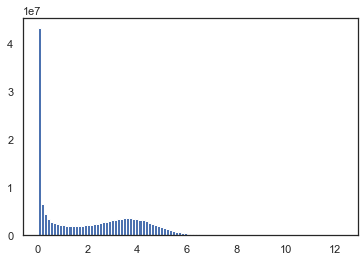

In [ ]:
plt.hist(df_tumor_norm_counts.values.flatten(), bins=100)
plt.show()

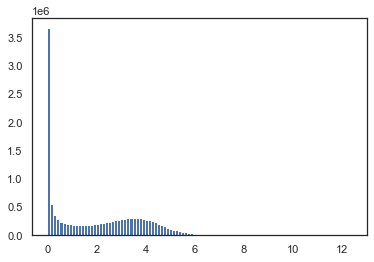

In [ ]:
plt.hist(df_normal_norm_counts.values.flatten(), bins=100)
plt.show()

#### Concatenate Normal & Tumor samples

In [ ]:
# Create uniform label for normal samples
labels = df_tumor_annots['Type'].tolist() + np.repeat('Normal', len(df_normal_annots)).tolist()

# Merge datasets
df_tcga_merge = pd.concat([df_tumor_norm_counts, df_normal_norm_counts])
df_tcga_merge.index.name = 'ID'
df_tcga_merge.head()

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tAKR
ID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047-01A-01R-1849-01,0.599829,2.150369,0.713419,0.027025,1.442780,7.499016,1.304154,0.103976,1.218835,0.103976,...,3.137746,2.169326,2.806964,4.066668,0.078978,4.088029,5.390064,4.313696,3.468598,0.027025
TCGA-02-0055-01A-01R-1849-01,0.565848,3.097381,0.750298,0.068909,1.677401,7.677711,0.174151,0.046463,3.274128,0.068909,...,2.632767,1.741925,2.580128,3.456292,0.322424,3.812805,6.393163,3.484399,3.581627,0.023501
TCGA-02-2483-01A-01R-1849-01,0.750640,2.900980,0.750640,0.021692,1.097110,7.153487,0.316842,0.161633,1.841613,0.042923,...,3.734684,1.392807,3.153204,3.961006,1.301630,4.241710,5.750604,3.909594,3.719381,0.000000
TCGA-02-2485-01A-01R-1849-01,0.596224,1.563069,0.487910,0.023026,2.131848,6.106019,2.615301,0.130815,2.315581,0.023026,...,3.278238,2.137358,2.690755,4.339622,0.023026,4.077920,5.700630,4.152791,3.680499,0.023026
TCGA-02-2486-01A-01R-1849-01,0.507559,1.818514,0.492132,0.025114,2.263994,7.603838,1.960612,0.119701,1.143040,0.025114,...,1.582203,1.676885,2.253365,3.490898,0.000000,3.496309,5.951386,3.458608,3.302096,0.000000


#### Select cancer-type-specific significant genes

For each cancer type, perform ANOVA (tumor vs. peripheral normal samples), find top N differentially expressed genes (DEGs) based on F-score

In [ ]:
from scipy.stats import f_oneway, F_onewayConstantInputWarning

In [ ]:
# F-test: (tumor, normal) pairs of each cancer type

def find_degs(df, tumor_annots, normal_annots, types, n=300):
    degs = []
    
    for t in types:
        df_tumor = df.loc[tumor_annots[tumor_annots['Type'] == t].index]
        df_normal = df.loc[normal_annots[normal_annots['Type'] == t].index]
        
        f_vals, _ = f_oneway(df_tumor.values, df_normal.values)
        f_vals[np.isnan(f_vals)] = -np.inf

        curr_degs = df.columns[f_vals.argsort()[::-1][:n]]
        degs.extend(curr_degs)
    
    return sorted(list(set(degs)))


In [ ]:
degs = find_degs(df_tcga_merge, df_tumor_annots, df_normal_annots, np.unique(df_tumor_annots))

/Users/yinuo/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


#### Save preprocessed matrices

In [ ]:
# Save log-normalized tumor counts & normal counts
df_tumor_norm_counts.to_csv(os.path.join(data_path, 'processed_tumor_counts.csv'), index=True)
df_normal_norm_counts.to_csv(os.path.join(data_path, 'processed_normal_counts.csv'), index=True)

# Save annotations
df_tumor_annots.to_csv(os.path.join(data_path, 'tumor_annotation.csv'), index=True)
df_normal_annots.to_csv(os.path.join(data_path, 'normal_annotation.csv'), index=True)

---